# 5장-3절. Boosting
- 정의
    - 여러 개의 weak learner를 순차적으로 학습-예측하면서 잘못 예측한 데이터에 가중치 부여를 통해 오류를 개선해 나가면서 학습하는 방식
- 종류
    - AdaBoost(Adptive boosting)
    - Gradient Boosting Machine
        - AdaBoost와의 차이는 경사 하강법을 이용하는 것이 큰 차이이다.
        - 종류
            - XGBoost
            - LightGBM
            - Catboost
- gradienboosting과 adboost, xgboost는 중요변수 추출 메소드가 있다.
- XGBoost 학습파라미터를 참고하면 된다.

---
---

# 01. AdaBoost
- 하이퍼파라미터
    - base_estimator
        - 부스트 앙상블이 구축되는 기본 추정기 (default는 None = 결정나무)
    - n_estimators
        - 최대 추정기 수
    - learning_rate
        - 각 반복에서 각 분류기에 적용되는 가중치
        - 학습률 높을수록 각 분류기의 기여도 높아짐
        - n_estimators와 상호 보완적으로 조합해야 한다.

In [41]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [42]:
data = pd.read_csv("./data/otto_train.csv")
data.head()

,id,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,...,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93,target
0,1,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,Class_1
1,2,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,Class_1
2,3,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,Class_1
3,4,1,0,0,1,6,1,5,0,0,...,0,1,2,0,0,0,0,0,0,Class_1
4,5,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,Class_1


In [43]:
data = data.drop(['id'], axis=1)

In [44]:
mapping_dict = {"Class_1": 1,
                "Class_2": 2,
                "Class_3": 3,
                "Class_4": 4,
                "Class_5": 5,
                "Class_6": 6,
                "Class_7": 7,
                "Class_8": 8,
                "Class_9": 9}
data['target'] = data['target'].apply(lambda x: mapping_dict[x])

In [45]:
from sklearn.model_selection import train_test_split

feature_columns = list(data.columns.difference(['target'])) # target을 제외한 모든 행

X = data[feature_columns]
y = data['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,stratify=y, random_state = 42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((49502, 93), (49502,), (12376, 93), (12376,))

In [46]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

clf = AdaBoostClassifier(n_estimators=100)
clf.fit(X_train,y_train)
pred1 = clf.predict(X_test)
print(accuracy_score(y_test, pred1))

0.6860859728506787


In [47]:
tree_model = DecisionTreeClassifier(max_depth=5)
clf = AdaBoostClassifier(base_estimator=tree_model, n_estimators=10)
clf.fit(X_train,y_train)
pred2 = clf.predict(X_test)
print(accuracy_score(y_test,pred2))

0.6936005171299289


---
---

# 02. GBM(GradientBoostingMachine)
- 하이퍼파라미터
    - n_estimators
    - max_depth
    - max_features
    - loss
        - 경사 하강법에서 사용할 비용 함수 지정
        - [‘deviance’, ‘exponential’], default=’deviance’
    - learning_rate
        - 학습 진행할 때마다 적용하는 학습률
        - 0~1, default=0.1
        - 너무 작은 값 적하면 예측 성능 높아질 가능성 높지만 수행시간 오래걸리고, 아예 최소오류값을 찾지 못할 수도 있다.
        - 큰 값 적용하면 최소 오류 값 찾지 못하고 그냥 지나쳐버려 예측 성능 떨어질 가능성 높지만 빠른 수행 가능
        - n_estimators와 상호 보완적으로 조합해야 한다.
    - n_estimators
        - weak leaner수의 개수
        - 많을수록 일정 수준까지 좋아짐
    - subsample
        - weakl learner가 학습에 사용하는 데이터 샘플링 비율
        - default = 1
        - 과적합이 염려되는 경우 subsampling을 1보다 작은 값으로 설정한다.

In [48]:
from sklearn.ensemble import GradientBoostingClassifier

X = data[feature_columns]
y = data['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,stratify=y, random_state = 42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((49502, 93), (49502,), (12376, 93), (12376,))

In [49]:
import time
start_time = time.time()

gb_clf = GradientBoostingClassifier()
gb_clf.fit(X_train,y_train)
gb_pred = gb_clf.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_pred)
print('GBM 정확도 : {0:.4f}'.format(gb_accuracy))
print('GBM 수행시간 : {0:.1f}'.format(time.time() - start_time))

GBM 정확도 : 0.7864
GBM 수행시간 : 247.1


---
---

# 03. XGBoost(eXtra Grandient Boost)
- GBM 기반으로, GBM의 단점인 느린 수행 시간 및 과적합 규제 부재 등이 문제를 해결
- 영향을 많이주는 파라미터는 max_depth, learning_rate, n_estimators 정도
- 하이퍼파라미터
    - n_estimators
    - max_depth
    - max_features
    - learning_rate
        - default = 0.1 , 보통 0.01~0.2 사이 값 선호
    - n_estimators
    - min_child_weight
        - 트리에서 추가적으로 가지를 나눌지를 결정하기 위해 필요한 데이터들의 weight 총합
        - 이 값이 클수록 분할을 자제한다. 과적합 조절하기 위해 사용
        - default=1
        
    - min_split_loss
        - 트리의 리프 노드를 추가적으로 나눌지를 결정할 최소 손실 감소 값
        - 해당 값보다 큰 손실이 감소된 경우에 리프 노드를 분리한다. 
        - 값이 클수록 과적합 감소 효과
        - default=0 
    - subsample
        - weakl learner가 학습에 사용하는 데이터 샘플링 비율
        - default = 1
        - 과적합이 염려되는 경우 subsampling을 1보다 작은 값으로 설정한다.
- 학습 task 파라미터
    - objective
        - 최솟값을 가져야할 손실 함수 정의
            - binary:logistic => 이진 분류일 때 적용
            - multi:softmax => 다중 분류일 때 적용, 이때는 레이블 클래스의 개수인 num_class 파라미터를 지정해야 한다.
            - multi:softprob => multi:softamx와 유사하나, 개별 레이블 클래스의 해당되는 예측 확률을 반환한다.
    - evel_set
        - 성능 평가를 수행할 평가용 데이터 세트를 설정
    - early_stopping_rounds
        - 지정한 수만큼 eval_meric기준 성능향상이 없으면 모델학습을 중단
    - eval_metric
        - 검증에 사용되는 함수를 정의
        - 회귀의 경우 기본값=rmse, 분류일 경우에는 error이다.(주로 분류일 경우에는 error 또는 logloss 사용)
            - rmse
            - mse
            - logloss
            - error
            - merror
            - mlogloss
            - auc
        

In [54]:
from xgboost import XGBClassifier

xgb_wrapper = XGBClassifier(objective='multi:softmax',
                            num_class= len(set(y_train)) + 1,
                            n_estimators=100,
                            learning_rate = 0.1,
                            max_depth=10)
xgb_wrapper.fit(X_train,y_train, eval_metric='merror')
w_pred = xgb_wrapper.predict(X_test)
w_pred_proba = xgb_wrapper.predict_proba(X_test)[:,1]

In [55]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score

accuracy_score(y_test,w_pred)

0.8142372333548804

In [58]:
from xgboost import XGBClassifier

xgb_wrapper = XGBClassifier(objective='multi:softmax',
                            num_class= len(set(y_train)) + 1,
                            n_estimators=100,
                            learning_rate = 0.1,
                            max_depth=10)
evals = [(X_test, y_test)]
xgb_wrapper.fit(X_train,y_train, early_stopping_rounds=30, eval_metric='mlogloss',
               eval_set=evals, verbose=True)
ws100_pred = xgb_wrapper.predict(X_test)
ws100_pred_proba = xgb_wrapper.predict_proba(X_test)[:,1]

[0]	validation_0-mlogloss:1.94112
[1]	validation_0-mlogloss:1.76105
[2]	validation_0-mlogloss:1.62111
[3]	validation_0-mlogloss:1.50690
[4]	validation_0-mlogloss:1.41049
[5]	validation_0-mlogloss:1.32834
[6]	validation_0-mlogloss:1.25596
[7]	validation_0-mlogloss:1.19278
[8]	validation_0-mlogloss:1.13685
[9]	validation_0-mlogloss:1.08689
[10]	validation_0-mlogloss:1.04266
[11]	validation_0-mlogloss:1.00229
[12]	validation_0-mlogloss:0.96534
[13]	validation_0-mlogloss:0.93164
[14]	validation_0-mlogloss:0.90107
[15]	validation_0-mlogloss:0.87300
[16]	validation_0-mlogloss:0.84769
[17]	validation_0-mlogloss:0.82478
[18]	validation_0-mlogloss:0.80361
[19]	validation_0-mlogloss:0.78397
[20]	validation_0-mlogloss:0.76601
[21]	validation_0-mlogloss:0.74928
[22]	validation_0-mlogloss:0.73400
[23]	validation_0-mlogloss:0.71975
[24]	validation_0-mlogloss:0.70669
[25]	validation_0-mlogloss:0.69448
[26]	validation_0-mlogloss:0.68294
[27]	validation_0-mlogloss:0.67222
[28]	validation_0-mlogloss:0.6

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

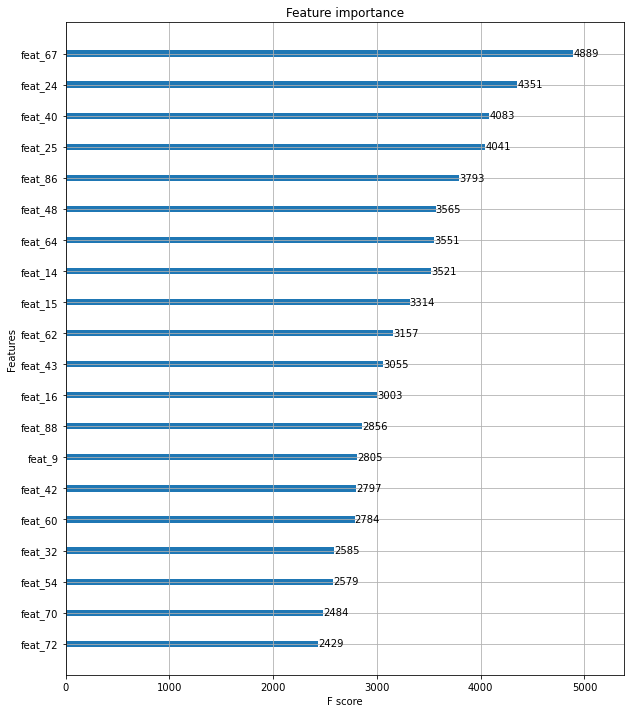

In [75]:
from xgboost import plot_importance

f, ax = plt.subplots(figsize=(10,12))
plot_importance(xgb_wrapper,ax=ax,max_num_features=20)

In [79]:
f_i = pd.Series(xgb_wrapper.feature_importances_, index=X_train.columns)
f_i_top20 = f_i.sort_values(ascending=False)[:20]

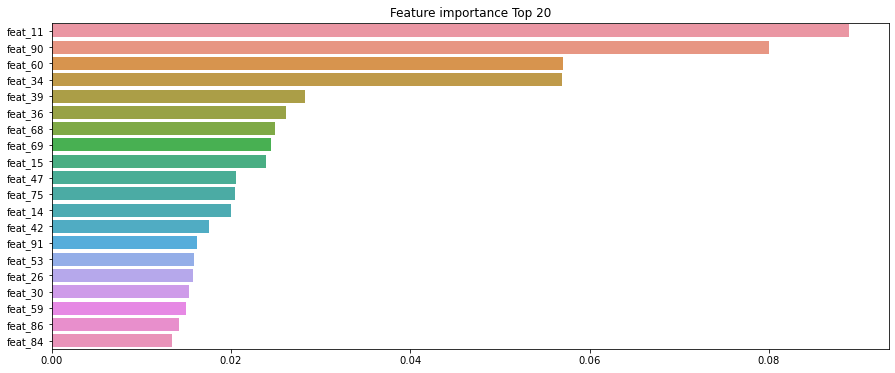

In [80]:
plt.figure(figsize=(15,6))
plt.title('Feature importance Top 20')
sns.barplot(x=f_i_top20, y=f_i_top20.index)
plt.show()

---
---

## 04. LightGBM

In [81]:
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()
X= data.data
y= data.target

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,stratify=y)

In [34]:
from lightgbm import LGBMClassifier

lgbm_wrapper = LGBMClassifier(n_estimators=400)

evals = [(X_test, y_test)]
lgbm_wrapper.fit(X_train, y_train, early_stopping_rounds=100, eval_metric='logloss',
                eval_set=evals, verbose=True)
lgbm_pred = lgbm_wrapper.predict(X_test)
lgbm_pred_proba = lgbm_wrapper.predict_proba(X_test)[:,1]

[1]	valid_0's binary_logloss: 0.583308
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.52551
[3]	valid_0's binary_logloss: 0.481243
[4]	valid_0's binary_logloss: 0.4364
[5]	valid_0's binary_logloss: 0.399007
[6]	valid_0's binary_logloss: 0.365214
[7]	valid_0's binary_logloss: 0.341984
[8]	valid_0's binary_logloss: 0.318631
[9]	valid_0's binary_logloss: 0.295924
[10]	valid_0's binary_logloss: 0.276981
[11]	valid_0's binary_logloss: 0.258847
[12]	valid_0's binary_logloss: 0.245438
[13]	valid_0's binary_logloss: 0.232831
[14]	valid_0's binary_logloss: 0.221283
[15]	valid_0's binary_logloss: 0.213049
[16]	valid_0's binary_logloss: 0.204001
[17]	valid_0's binary_logloss: 0.196427
[18]	valid_0's binary_logloss: 0.188865
[19]	valid_0's binary_logloss: 0.182296
[20]	valid_0's binary_logloss: 0.176942
[21]	valid_0's binary_logloss: 0.170566
[22]	valid_0's binary_logloss: 0.163561
[23]	valid_0's binary_logloss: 0.159973
[24]	valid_0's binary_logloss:

In [36]:
from sklearn.metrics import confusion_matrix, accuracy_score

print(confusion_matrix(y_test,lgbm_pred))
print(accuracy_score(y_test,lgbm_pred))

[[39  3]
 [ 1 71]]
0.9649122807017544


---
---

# 05. Catboost
- categoricla feature를 one-hot-encoding 방식이 아니라, 수치형으로 변환하는 방법 제안한 것
    - 따라서, categorical features가 많은 경우 잘 맞는다고 알려져 있다.
- 하이퍼파리미터
    - eval_metric
        - ['Logloss', 'AUC']

In [93]:
from catboost import CatBoostClassifier



cat_wrapper = CatBoostClassifier(n_estimators=400,
                                 eval_metric='AUC',
                                 objective = 'MultiClass',
                                )
evals = [(X_test, y_test)]

cat_wrapper.fit(X_train, y_train,eval_set=evals,early_stopping_rounds=100)
cat_pred = cat_wrapper.predict(X_test)
cat_pred_proba = cat_wrapper.predict_proba(X_test)[:,1]

Learning rate set to 0.150835
0:	test: 0.9510582	best: 0.9510582 (0)	total: 26.5ms	remaining: 10.6s
1:	test: 0.9732143	best: 0.9732143 (1)	total: 47.9ms	remaining: 9.54s
2:	test: 0.9798280	best: 0.9798280 (2)	total: 70ms	remaining: 9.27s
3:	test: 0.9761905	best: 0.9798280 (2)	total: 98.3ms	remaining: 9.73s
4:	test: 0.9785053	best: 0.9798280 (2)	total: 117ms	remaining: 9.21s
5:	test: 0.9775132	best: 0.9798280 (2)	total: 132ms	remaining: 8.67s
6:	test: 0.9755291	best: 0.9798280 (2)	total: 148ms	remaining: 8.33s
7:	test: 0.9742063	best: 0.9798280 (2)	total: 166ms	remaining: 8.15s
8:	test: 0.9738757	best: 0.9798280 (2)	total: 186ms	remaining: 8.06s
9:	test: 0.9765212	best: 0.9798280 (2)	total: 201ms	remaining: 7.84s
10:	test: 0.9735450	best: 0.9798280 (2)	total: 216ms	remaining: 7.63s
11:	test: 0.9735450	best: 0.9798280 (2)	total: 235ms	remaining: 7.58s
12:	test: 0.9728836	best: 0.9798280 (2)	total: 250ms	remaining: 7.43s
13:	test: 0.9718915	best: 0.9798280 (2)	total: 265ms	remaining: 7.29

121:	test: 0.9794974	best: 0.9828042 (47)	total: 2.42s	remaining: 5.51s
122:	test: 0.9794974	best: 0.9828042 (47)	total: 2.44s	remaining: 5.49s
123:	test: 0.9798280	best: 0.9828042 (47)	total: 2.47s	remaining: 5.49s
124:	test: 0.9798280	best: 0.9828042 (47)	total: 2.51s	remaining: 5.52s
125:	test: 0.9798280	best: 0.9828042 (47)	total: 2.53s	remaining: 5.51s
126:	test: 0.9794974	best: 0.9828042 (47)	total: 2.56s	remaining: 5.49s
127:	test: 0.9794974	best: 0.9828042 (47)	total: 2.58s	remaining: 5.48s
128:	test: 0.9794974	best: 0.9828042 (47)	total: 2.61s	remaining: 5.47s
129:	test: 0.9794974	best: 0.9828042 (47)	total: 2.63s	remaining: 5.45s
130:	test: 0.9794974	best: 0.9828042 (47)	total: 2.64s	remaining: 5.42s
131:	test: 0.9794974	best: 0.9828042 (47)	total: 2.65s	remaining: 5.39s
132:	test: 0.9794974	best: 0.9828042 (47)	total: 2.67s	remaining: 5.36s
133:	test: 0.9794974	best: 0.9828042 (47)	total: 2.68s	remaining: 5.33s
134:	test: 0.9798280	best: 0.9828042 (47)	total: 2.7s	remaining: